## Pearson correlation calculation between fisher info and model perplexity

# base Function

In [1]:
import json
import re
import matplotlib.pyplot as plt
import numpy as np


def draw_fisher_bar(file_path,percentage):
    feature = re.search(r"(\d+_\d+)", file_path).group(1)
    print(feature)
    with open(file_path, "r") as file:
        data = json.load(file)
    
    # Extract keys for plotting
    keys = [
        "self_attn.q_proj.weight", "self_attn.k_proj.weight", "self_attn.v_proj.weight",
        "self_attn.o_proj.weight", "mlp.gate_proj.weight", "mlp.up_proj.weight",
        "mlp.down_proj.weight"
    ]
    
    # Create subplots for each key
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
    axes = axes.flatten()
    
    global_min = min(min(data[str(idx)][key] for idx in range(len(data))) for key in keys)
    global_max = min(max(max(data[str(idx)][key] for idx in range(len(data))) for key in keys),50)
    
    
    for i, key in enumerate(keys):
        values = [data[str(idx)][key] for idx in range(len(data))]
        axes[i].bar(range(len(values)), values, color="skyblue", edgecolor="black")
        axes[i].set_title(key)
        axes[i].set_xlabel("Transformer block ID")
        axes[i].set_ylabel("Fisher Info")
        axes[i].set_ylim(global_min, global_max)
    
    # Remove the extra subplot if necessary
    if len(keys) < len(axes):
        for j in range(len(keys), len(axes)):
            fig.delaxes(axes[j])
            
    plt.tight_layout()
    # plt.show()
    plt.savefig(f"/root/autodl-tmp/methods/mix_quantize/visualization/llama2-7b/Total_Fisher_bar_chart_{feature}_{percentage}.png")
    plt.close()

In [7]:
def draw_perplexity(file_path,percentage):
    feature = re.search(r"(\d+_\d+)", file_path).group(1)
    original_perplexity = float(re.search(r"(\d+\.\d+)", file_path).group(1))
    print(feature,original_perplexity)
    with open(file_path, "r") as file:
        data = json.load(file)
    
    # Extract keys for plotting
    keys = [
        "self_attn.q_proj.weight", "self_attn.k_proj.weight", "self_attn.v_proj.weight",
        "self_attn.o_proj.weight", "mlp.gate_proj.weight", "mlp.up_proj.weight",
        "mlp.down_proj.weight"
    ]
    
    # Create subplots for each key
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
    axes = axes.flatten()
    
    global_min = min(min(data[str(idx)][key] for idx in range(len(data))) for key in keys)
    global_max = max(max(data[str(idx)][key] for idx in range(len(data))) for key in keys)
    
    
    for i, key in enumerate(keys):
        values = [data[str(idx)][key] for idx in range(len(data))]
        axes[i].bar(range(len(values)), values, color="skyblue", edgecolor="black")
        axes[i].set_title(key)
        axes[i].set_xlabel("Transformer block ID")
        axes[i].set_ylabel("Perplexity")
        axes[i].set_ylim(global_min, global_max)
    
    # Remove the extra subplot if necessary
    if len(keys) < len(axes):
        for j in range(len(keys), len(axes)):
            fig.delaxes(axes[j])
            
    plt.tight_layout()
    # plt.show()
    plt.savefig(f"/root/autodl-tmp/methods/mix_quantize/visualization/llama2-7b/Total_Perplrxity_bar_chart_{feature}_{percentage}.png")
    plt.close()

root_path = "/root/autodl-tmp/methods/mix_quantize/model_info/llama2-7b/"

# 4096 2 0.2

In [23]:
filename = "fisher_data_4096_2_2024-12-20-22-26-03.json"
draw_fisher_bar(root_path+filename,0.2)

4096_2


In [24]:
filename = "modified_perplexitys_4096_2_2024-12-21-11-15-11_2.556640625.json"
draw_perplexity(root_path+filename,0.2)

4096_2 2.556640625


# 4096 2 0.5

In [25]:
filename = "fisher_data_4096_2_2024-12-21-11-35-11.json"
draw_fisher_bar(root_path+filename,0.5)

4096_2


In [3]:
filename = "modified_perplexitys_4096_2_2024-12-21-11-35-11_2.556640625.json"
draw_perplexity(root_path+filename,0.5)

4096_2 2.556640625


# 4096 20 0.5

In [27]:
filename = "fisher_data_4096_20_2024-12-21-15-40-48.json"
draw_fisher_bar(root_path+filename,0.5)

4096_20


In [28]:
filename = "modified_perplexitys_4096_20_2024-12-21-15-40-48_2.44140625.json"
draw_perplexity(root_path+filename,0.5)

4096_20 2.44140625


# 2048 2 0.2

In [19]:
filename = "fisher_data_2048_2024-12-20-21-59-30.json"
draw_fisher_bar(root_path+filename)

2048_2024


In [20]:
filename = "modified_perplexitys_2048_2024-12-20-21-59-30_2.49609375.json"
draw_perplexity(root_path+filename)

2048_2024 2.49609375


# 1024 2 0.2

In [5]:
filename = "fisher_data_1024_2_2024-12-21-15-55-27.json"
draw_fisher_bar(root_path+filename,0.2)

1024_2


In [6]:
filename = "modified_perplexitys_1024_2_2024-12-21-15-55-27_2.7421875.json"
draw_perplexity(root_path+filename,0.2)

1024_2 2.7421875


# 1024 2 0.5

In [9]:
filename = "fisher_data_1024_2_2024-12-21-16-24-25.json"
draw_fisher_bar(root_path+filename,0.5)

1024_2


In [8]:
filename = "modified_perplexitys_1024_2_2024-12-21-16-24-25_2.7421875.json"
draw_perplexity(root_path+filename,0.5)

1024_2 2.7421875


# 1024 2 0.75

In [14]:
filename = "fisher_data_1024_2_2024-12-21-17-22-47.json"
draw_fisher_bar(root_path+filename,0.75)

1024_2


In [13]:
filename = "modified_perplexitys_1024_2_2024-12-21-17-22-47_2.7421875.json"
draw_perplexity(root_path+filename,0.75)

1024_2 2.7421875


# 1024 10 0.2

In [20]:
filename = "fisher_data_1024_10_2024-12-21-16-16-37.json"
draw_fisher_bar(root_path+filename,0.2)

1024_10


In [16]:
filename = "modified_perplexitys_1024_10_2024-12-21-16-16-37_2.60546875.json"
draw_perplexity(root_path+filename,0.2)

1024_10 2.60546875


# 1024 10 0.5

In [11]:
filename = "fisher_data_1024_10_2024-12-21-16-44-29.json"
draw_fisher_bar(root_path+filename,0.5)

1024_10


In [12]:
filename = "modified_perplexitys_1024_10_2024-12-21-16-44-29_2.60546875.json"
draw_perplexity(root_path+filename,0.5)

1024_10 2.60546875


# 随机扰动下的组合层困惑度变化以及fisher info结果

In [15]:
import json
import re
import matplotlib.pyplot as plt
import numpy as np


def draw_layerblock_fisher(file_path,percentage):
    feature = re.search(r"(\d+_\d+)", file_path).group(1)
    print(feature)
    with open(file_path, "r") as file:
        datas = json.load(file)
    for bit in datas.keys():
        data = datas[f"{bit}"]
        # Extract keys for plotting
        keys = [
                "self_attn.q_proj", "self_attn.k_proj", "self_attn.v_proj",
                "self_attn.o_proj", "mlp.gate_proj", "mlp.up_proj",
                "mlp.down_proj"
            ]
        # keys = []
        # for step,key in enumerate(total_keys):
        #     if (step+1)%3 ==1:
                # keys.append(key)
        
        # Create subplots for each key
        fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
        axes = axes.flatten()
        
        global_min = min(min(data[str(idx)][key] for idx in range(len(data))) for key in keys)
        global_max = min(max(max(data[str(idx)][key] for idx in range(len(data))) for key in keys),10)
        
        
        for i, key in enumerate(keys):
            values = [data[str(idx)][key] for idx in range(len(data))]
            axes[i].bar(range(len(values)), values, color="skyblue", edgecolor="black")
            axes[i].set_title(key)
            axes[i].set_xlabel("Transformer block ID")
            axes[i].set_ylabel("Fisher Info")
            axes[i].set_ylim(global_min, global_max)
        
        # Remove the extra subplot if necessary
        if len(keys) < len(axes):
            for j in range(len(keys), len(axes)):
                fig.delaxes(axes[j])
                
        plt.tight_layout()
        # plt.show()
        plt.savefig(f"/root/autodl-tmp/methods/mix_quantize/visualization/llama2-7b/Total_Fisher_bar_chart_{feature}_{percentage}.png")
        plt.close()

In [26]:
def draw_layerblock_perplexity(file_path,percentage):
    feature = re.search(r"(\d+_\d+)", file_path).group(1)
    original_perplexity = float(re.search(r"(\d+\.\d+)", file_path).group(1))
    print(feature,original_perplexity)
    with open(file_path, "r") as file:
        datas = json.load(file)

    for bit in datas.keys():
        data = datas[f"{bit}"]
        # Extract keys for plotting
        total_keys = [
            "self_attn.q_proj", "self_attn.k_proj", "self_attn.v_proj",
            "self_attn.o_proj", "mlp.gate_proj", "mlp.up_proj",
            "mlp.down_proj"
        ]
        keys = []
        for step,key in enumerate(total_keys):
            if (step+1)%3 ==1:
                keys.append(key)

        print(keys)
        
        # Create subplots for each key
        fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
        axes = axes.flatten()
        
        global_min = min(min(data[str(idx)][key] for idx in range(len(data))) for key in keys)
        global_max = max(max(data[str(idx)][key] for idx in range(len(data))) for key in keys)
        global_min = max(global_min,original_perplexity)
        
        
        for i, key in enumerate(keys):
            if i < len(keys)-1:
                title = total_keys[i*3]+" "+total_keys[i*3+1]+ " " +total_keys[i*3+2]
            else:
                title = total_keys[i*3]
            values = [data[str(idx)][key] for idx in range(len(data))]
            axes[i].bar(range(len(values)), values, color="skyblue", edgecolor="black")
            axes[i].set_title(title)
            axes[i].set_xlabel("Transformer block ID")
            axes[i].set_ylabel("Perplexity")
            axes[i].set_ylim(global_min, global_max)
        
        # Remove the extra subplot if necessary
        if len(keys) < len(axes):
            for j in range(len(keys), len(axes)):
                fig.delaxes(axes[j])
                
        plt.tight_layout()
        # plt.show()
        plt.savefig(f"/root/autodl-tmp/methods/mix_quantize/visualization/llama2-7b/Total_Perplrxity_bar_chart_{feature}_{percentage}.png")
        plt.close()

root_path = "/root/autodl-tmp/methods/mix_quantize/model_info/llama2-7b/"

In [15]:
filename = "modified_perplexitys_1024_2_2024-12-23-13-33-03_2.7421875.json"
draw_layerblock_perplexity(root_path+filename,0.2)

1024_2 2.7421875
['self_attn.q_proj', 'self_attn.o_proj', 'mlp.down_proj']


In [16]:
filename = "modified_perplexitys_1024_16_2024-12-23-13-58-51_2.6171875.json"
draw_layerblock_perplexity(root_path+filename,0.2)

1024_16 2.6171875
['self_attn.q_proj', 'self_attn.o_proj', 'mlp.down_proj']


In [27]:
filename = "modified_perplexitys_1024_2_2024-12-23-14-07-30_2.7421875.json"
draw_layerblock_perplexity(root_path+filename,0.5)

1024_2 2.7421875
['self_attn.q_proj', 'self_attn.o_proj', 'mlp.down_proj']


In [16]:
filename = "fisher_data_1024_2_2024-12-23-14-07-30.json"
draw_layerblock_fisher(root_path+filename,0.5)

1024_2


# 真实量化下的组合层困惑度变化以及fisher info结果

In [21]:
import json
import re
import matplotlib.pyplot as plt
import numpy as np


def draw_layerblock_fisher(file_path):
    feature = re.search(r"(\d+_\d+)", file_path).group(1)
    print(feature)
    with open(file_path, "r") as file:
        datas = json.load(file)

    # Create subplots for each bit
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
    axes = axes.flatten()
    
    for num, bit in enumerate(datas.keys()):
        data = datas[f"{bit}"]
        # Extract keys for plotting
        total_keys = [
                "self_attn.q_proj", "self_attn.k_proj", "self_attn.v_proj",
                "self_attn.o_proj", "mlp.gate_proj", "mlp.up_proj",
                "mlp.down_proj"
            ]
        keys = []
        for step,key in enumerate(total_keys):
            if (step+1)%3 ==1:
                keys.append(key)
        
        global_min = min(min(data[str(idx)][key] for idx in range(len(data))) for key in keys)
        global_max = min(max(max(data[str(idx)][key] for idx in range(len(data))) for key in keys),10)
        

        for i, key in enumerate(keys):
            if i < len(keys)-1:
                title = total_keys[i*3]+" "+total_keys[i*3+1]+ " " +total_keys[i*3+2]
            else:
                title = total_keys[i*3]
            values = [data[str(idx)][key] for idx in range(len(data))]
            axes[num*len(keys)+i].bar(range(len(values)), values, color="skyblue", edgecolor="black")
            axes[num*len(keys)+i].set_title(title)
            axes[num*len(keys)+i].set_xlabel("Transformer block ID")
            axes[num*len(keys)+i].set_ylabel("Fisher Info")
            axes[num*len(keys)+i].set_ylim(global_min, global_max)
    
        
        # Remove the extra subplot if necessary
        # if len(keys) < len(axes):
        #     for j in range(len(keys), len(axes)):
        #         fig.delaxes(axes[j])
                
    plt.tight_layout()
    # plt.show()
    plt.savefig(f"/root/autodl-tmp/methods/mix_quantize/visualization/llama2-7b/Total_block_Fisher_bar_chart_{feature}.png")
    plt.close()

In [22]:
def draw_layerblock_perplexity(file_path):
    feature = re.search(r"(\d+_\d+)", file_path).group(1)
    original_perplexity = float(re.search(r"(\d+\.\d+)", file_path).group(1))
    print(feature,original_perplexity)
    with open(file_path, "r") as file:
        datas = json.load(file)

    # Create subplots for each bit
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
    axes = axes.flatten()

    for num, bit in enumerate(datas.keys()):
        data = datas[f"{bit}"]
        # Extract keys for plotting
        total_keys = [
            "self_attn.q_proj", "self_attn.k_proj", "self_attn.v_proj",
            "self_attn.o_proj", "mlp.gate_proj", "mlp.up_proj",
            "mlp.down_proj"
        ]
        keys = []
        for step,key in enumerate(total_keys):
            if (step+1)%3 ==1:
                keys.append(key)

        print(keys)
        
        global_min = min(min(data[str(idx)][key] for idx in range(len(data))) for key in keys)
        global_max = max(max(data[str(idx)][key] for idx in range(len(data))) for key in keys)
        global_min = max(global_min,original_perplexity)
        
        
        for i, key in enumerate(keys):
            if i < len(keys)-1:
                title = total_keys[i*3]+" "+total_keys[i*3+1]+ " " +total_keys[i*3+2]
            else:
                title = total_keys[i*3]
            values = [data[str(idx)][key] for idx in range(len(data))]
            axes[num*len(keys)+i].bar(range(len(values)), values, color="skyblue", edgecolor="black")
            axes[num*len(keys)+i].set_title(title)
            axes[num*len(keys)+i].set_xlabel("Transformer block ID")
            axes[num*len(keys)+i].set_ylabel("Perplexity")
            axes[num*len(keys)+i].set_ylim(global_min, global_max)
        
        # Remove the extra subplot if necessary
        # if len(keys) < len(axes):
        #     for j in range(len(keys), len(axes)):
        #         fig.delaxes(axes[j])
                
    plt.tight_layout()
    # plt.show()
    plt.savefig(f"/root/autodl-tmp/methods/mix_quantize/visualization/llama2-7b/Total_block_Perplrxity_bar_chart_{feature}.png")
    plt.close()

root_path = "/root/autodl-tmp/methods/mix_quantize/model_info/llama2-7b/"

In [23]:
filename = "fisher_data_1024_8_2024-12-28-12-51-55.json"
draw_layerblock_fisher(root_path+filename)
filename = "modified_perplexitys_1024_8_2024-12-28-12-51-55_2.623046875.json"
draw_layerblock_perplexity(root_path+filename)

1024_8
1024_8 2.623046875
['self_attn.q_proj', 'self_attn.o_proj', 'mlp.down_proj']
['self_attn.q_proj', 'self_attn.o_proj', 'mlp.down_proj']
['self_attn.q_proj', 'self_attn.o_proj', 'mlp.down_proj']
['self_attn.q_proj', 'self_attn.o_proj', 'mlp.down_proj']


# 加载文件数据

In [6]:
import os
from datetime import datetime

def find_latest_file_by_keyword(folder_path, keyword):
    # 获取文件夹中所有包含关键词的文件
    files = [
        os.path.join(folder_path, f) for f in os.listdir(folder_path)
        if os.path.isfile(os.path.join(folder_path, f)) and keyword in f
    ]

    if not files:
        return None

    def extract_timestamp(filename):
        try:
            parts = os.path.basename(filename).split('_')
            date_time_part = parts[-1].split('.')[0]  # 去掉.json
            return datetime.strptime(date_time_part, "%Y-%m-%d-%H-%M-%S")
        except (IndexError, ValueError):
            return datetime.min

    latest_file = max(files, key=extract_timestamp)

    if extract_timestamp(latest_file) == datetime.min:
        return None
    else:
        return latest_file

In [7]:
# 示例调用
folder_path = "/root/autodl-tmp/methods/mix_quantize/model_info/llama2-7b"
keyword = "fisher_data"
latest_file = find_latest_file_by_keyword(folder_path, keyword)
print(latest_file)  # 输出最晚的文件路径，如果没有则输出 None

/root/autodl-tmp/methods/mix_quantize/model_info/llama2-7b/fisher_data_1024_32_2025-02-28-16-10-27.json


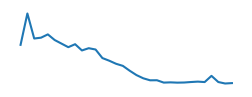

In [6]:
import matplotlib.pyplot as plt

values = [5.046875, 8.875, 5.8203125, 5.921875, 6.32421875, 5.63671875, 5.19921875, 4.76171875, 5.125, 4.36328125, 4.63671875, 4.4765625, 3.43359375, 3.111328125, 2.736328125, 2.48046875, 1.8896484375, 1.353515625, 0.9599609375, 0.71728515625, 0.72412109375, 0.436767578125, 0.4658203125, 0.431396484375, 0.447509765625, 0.5068359375, 0.5556640625, 0.501953125, 1.2587890625, 0.5068359375, 0.32666015625, 0.374755859375]
layers = list(range(32))

plt.figure(figsize=(3,1))
plt.plot(layers, values)
plt.axis('off')

for spine in plt.gca().spines.values():
    spine.set_visible(True)    # 设置边框可见
    spine.set_color('black')   # 设置边框颜色为黑色
    spine.set_linewidth(0.5)   # 设置边框线宽为 0.5
    
plt.savefig('/root/autodl-tmp/methods/mix_quantize/visualization/data/sparkline.pdf', bbox_inches='tight', pad_inches=0)